# Perform Exploratory Data Analysis on 'Indian Premiere League'

### <font color='darkblue'>Objective:: </font>
● Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

● As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.

● Suggest teams or players a company should endorse for its products.

● Dataset:https://bit.ly/34SRn3b

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
matches_df = pd.read_csv("matches.csv")
score_df = pd.read_csv("deliveries.csv")

In [3]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
score_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# DATA INFORMATION

In [5]:
print(matches_df.info())
print(score_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [6]:
matches_df["umpire3"].isnull().sum()

636

In [7]:
matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [8]:
# Matches we have got in the dataset 
matches_df['id'].max()

636

# IPL Years

In [14]:
# Seasons we have got in the dataset
matches_df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

# Total Innings Played By Year

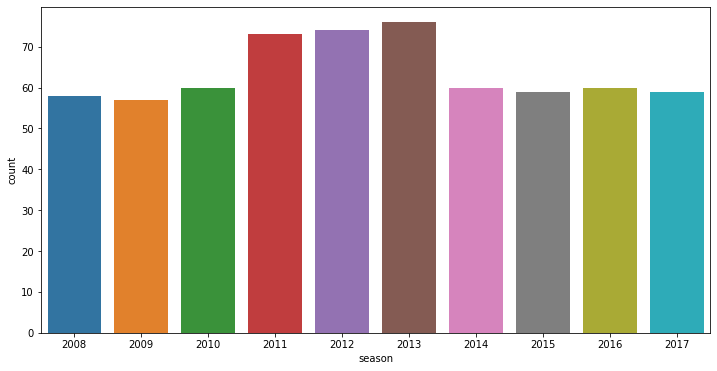

In [43]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', data=matches_df)
plt.show()

#### Description:
##### Max 76 Innings were played in 2013
#####  Min 57 Innings were played in 2009

# No of Team played per Year

In [28]:
matches_df.groupby("season")['team1'].value_counts().reset_index(name = 'Count')

,season,team1,Count
0,2008,Chennai Super Kings,9
1,2008,Kolkata Knight Riders,9
2,2008,Deccan Chargers,8
3,2008,Kings XI Punjab,7
4,2008,Royal Challengers Bangalore,7
...,...,...,...
79,2017,Rising Pune Supergiant,8
80,2017,Royal Challengers Bangalore,8
81,2017,Delhi Daredevils,6
82,2017,Kolkata Knight Riders,6


# Toss winning team counts per yearwise

In [31]:
matches_df.groupby("season")["toss_winner"].value_counts().reset_index(name = "Counts")

,season,toss_winner,Counts
0,2008,Rajasthan Royals,11
1,2008,Deccan Chargers,9
2,2008,Kings XI Punjab,8
3,2008,Mumbai Indians,8
4,2008,Delhi Daredevils,6
...,...,...,...
79,2017,Delhi Daredevils,8
80,2017,Gujarat Lions,7
81,2017,Rising Pune Supergiant,6
82,2017,Sunrisers Hyderabad,5


# Toss Decision Percentage Per Year

In [33]:
matches_df['toss_decision'].unique()

array(['field', 'bat'], dtype=object)

In [41]:
toss_df = matches_df['toss_decision'].value_counts().reset_index()
toss_df["Percentage"] = toss_df['toss_decision'].apply(lambda x : x / (363 + 273)*100)

In [66]:
toss_df

,index,toss_decision,Percentage
0,field,363,57.075472
1,bat,273,42.924528


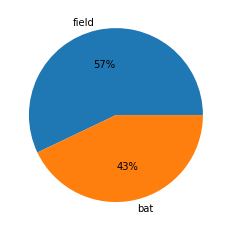

In [71]:
toss_df

#define data
data = toss_df['Percentage'].to_list()
labels = toss_df['index'].to_list()

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels,  autopct='%.0f%%')
plt.show()

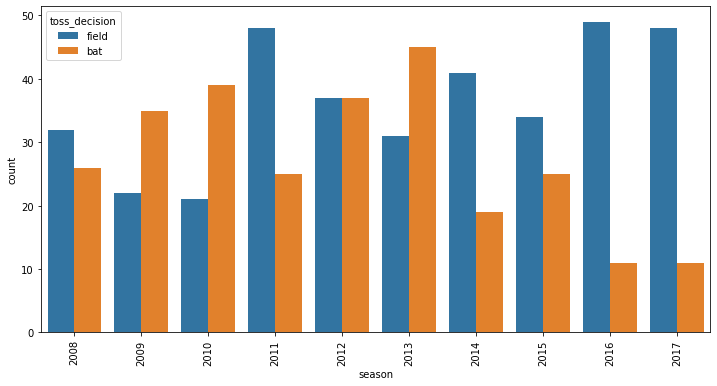

In [72]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=matches_df)
plt.xticks(rotation='vertical')
plt.show()

**Team won by Maximum Runs**


In [11]:
matches_df.iloc[matches_df['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [12]:
matches_df.iloc[matches_df['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

**Team won by Maximum Wickets**

In [13]:
matches_df.iloc[matches_df['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

**Team won by minimum runs**

In [14]:
matches_df.iloc[matches_df[matches_df['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

**Team won by Minimum Wickets**

In [15]:
matches_df.iloc[matches_df[matches_df['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                              NaN
Name: 559, dtype: object

In [16]:
matches_df.iloc[matches_df[matches_df['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]['winner']

'Kolkata Knight Riders'

## Observation : 

> 1. **Mumbai Indians** is the team which won by maximum and minimum **runs**
> 2. **Kolkata Knight Riders** is the team which won by maximum and minimum **wickets** 

# Matches won By Teams

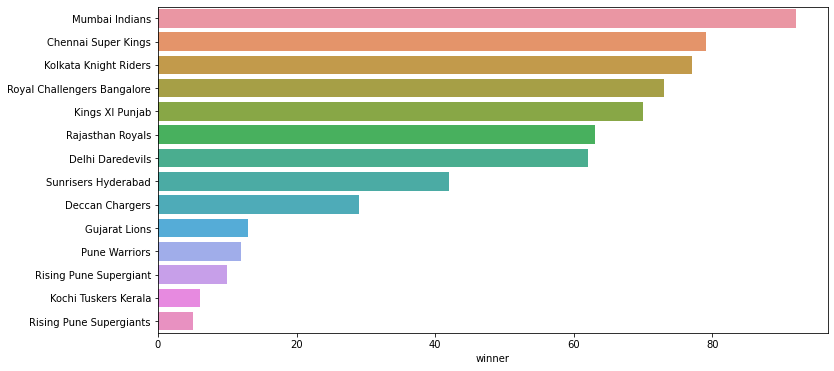

In [44]:
plt.figure(figsize=(12,6))
data = matches_df.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')
plt.show()

> **Mumbai Indians** are the winners in most of the matches

## Top Player of the match winners

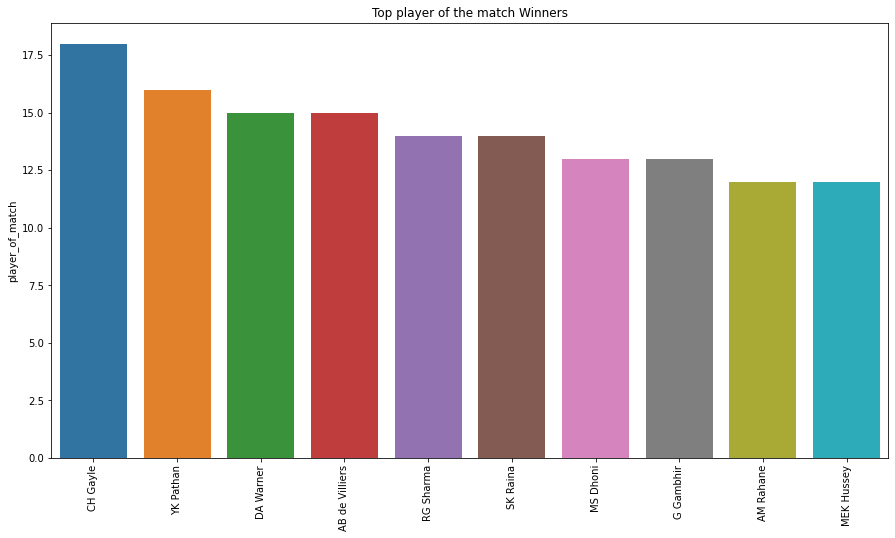

In [48]:
top_players = matches_df.player_of_match.value_counts()[:10]
#sns.barplot(x="day", y="total_bill", data=df)
fig, ax = plt.subplots(figsize=(15,8))

ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v');
plt.show()

> **CH Gayle** is the most Successful player in all match winners

**Number of matches in each venue:**

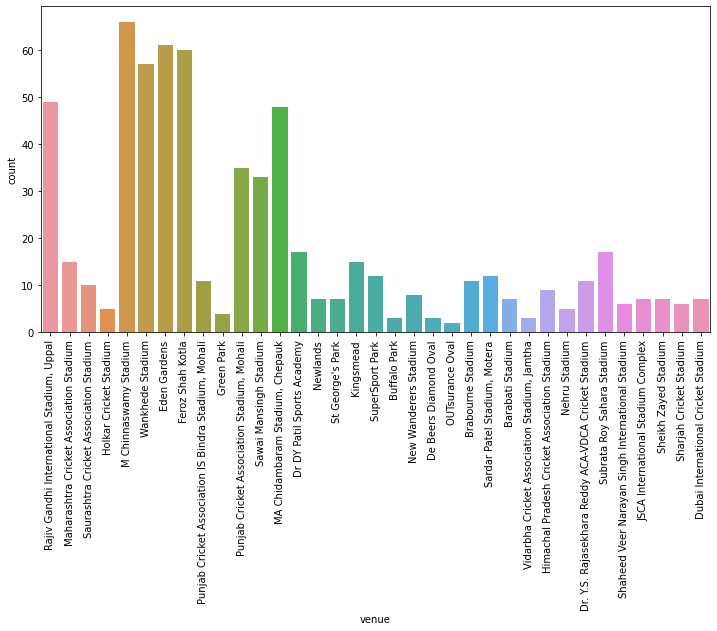

In [50]:
plt.figure(figsize=(12,6))
ax.set_title("Top player of the match Winners")
sns.countplot(x='venue', data=matches_df)
plt.xticks(rotation='vertical')
plt.show()

>  **"M Chinnaswamy Stadium"** 

**Champions each season:**

Now let us see the champions in each season.

In [61]:
temp_df = matches_df.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']]
temp_df

,season,winner
58,2017,Mumbai Indians
116,2008,Rajasthan Royals
173,2009,Deccan Chargers
233,2010,Chennai Super Kings
306,2011,Chennai Super Kings
380,2012,Kolkata Knight Riders
456,2013,Mumbai Indians
516,2014,Kolkata Knight Riders
575,2015,Mumbai Indians
635,2016,Sunrisers Hyderabad


## Top Champions through-out Year

<AxesSubplot:>

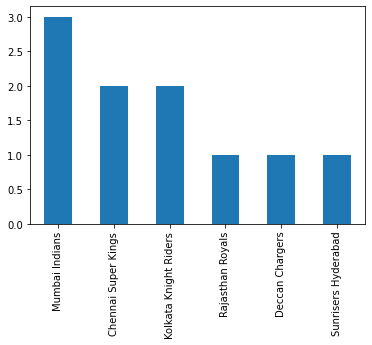

In [65]:
temp_df['winner'].value_counts().plot(kind="bar")

## Winning Percentage while selecting fielding first

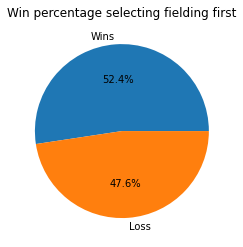

In [84]:

wins = (field_df.win_by_wickets>0).sum()
loss = (field_df.win_by_wickets==0).sum()
labels = ["Wins", "Loss"]
total = float(wins + loss)
percentage = [(wins/total)*100, (loss/total)*100]
plt.pie(percentage, labels=labels,
        autopct='%1.1f%%')
plt.title("Win percentage selecting fielding first")
plt.show()

## Winning Percentage while selecting batting first

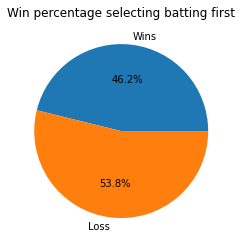

In [88]:

wins = (field_df.win_by_runs>0).sum()
loss = (field_df.win_by_runs==0).sum()
labels = ["Wins", "Loss"]
total = float(wins + loss)
percentage = [(wins/total)*100, (loss/total)*100]
plt.pie(percentage, labels=labels,
        autopct='%1.1f%%')
plt.title("Win percentage selecting batting first")
plt.show()

## Batsman analysis:

Let us start our analysis with batsman. Let us first see the ones with most number of IPL runs under their belt.

In [92]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

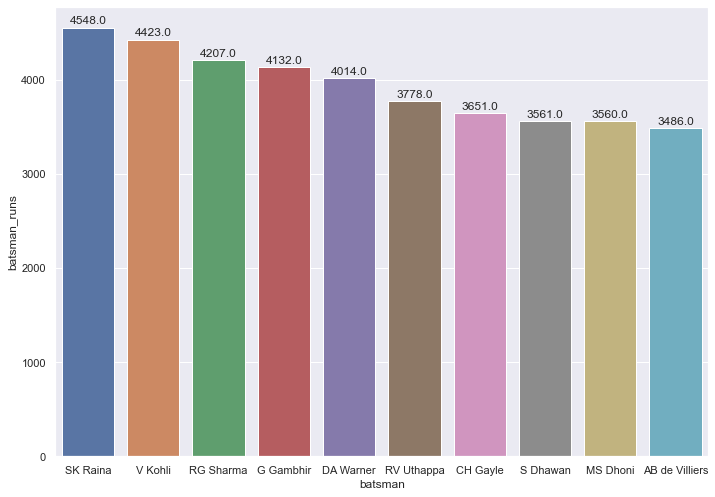

In [100]:
temp_df = score_df.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]
sns.set(rc={'figure.figsize':(11.7,8.27)})
p = sns.barplot(x="batsman", y="batsman_runs", data = temp_df)
show_values(p)

> **Suresh Raina** is leading the chart followed closely by **Virat Kohli**. **Gayle** is the top scorer among foreign players.

##  Now let us see the players with more number of boundaries(4) in IPL.

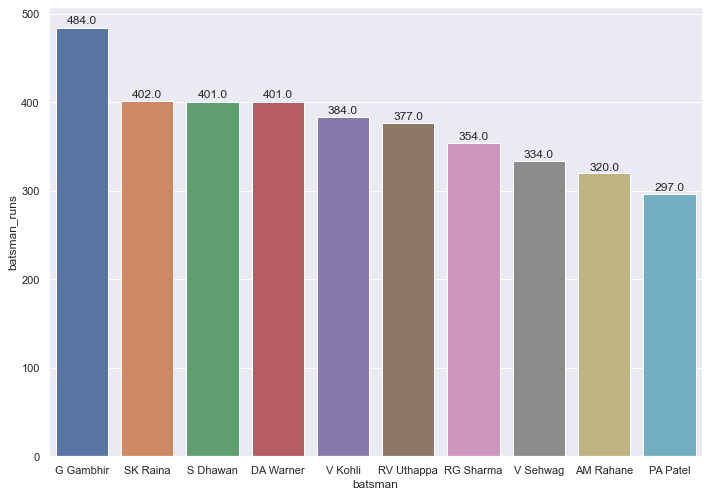

In [104]:
# Now let us see the players with more number of boundaries in IPL.
temp_df = score_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

sns.set(rc={'figure.figsize':(11.7,8.27)})
p = sns.barplot(x="batsman", y="batsman_runs", data = temp_df)
show_values(p)

##  Now let us see the players with more number of boundaries(6) in IPL.

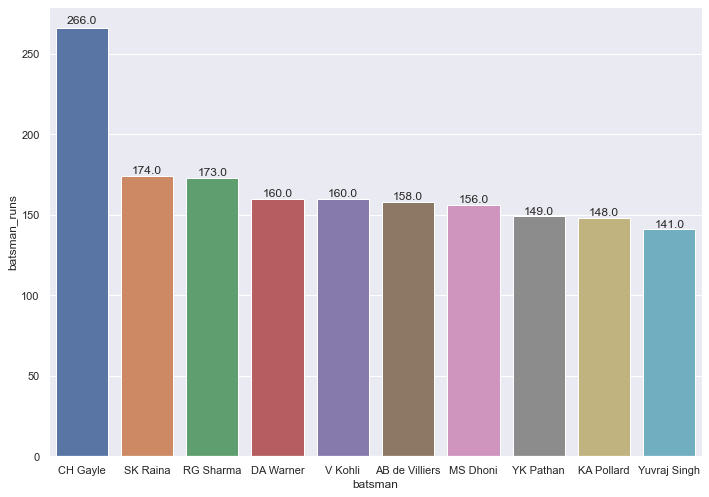

In [105]:
# Now let us see the players with more number of boundaries in IPL.
temp_df = score_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

sns.set(rc={'figure.figsize':(11.7,8.27)})
p = sns.barplot(x="batsman", y="batsman_runs", data = temp_df)
show_values(p)

# Now let us see the batsman who has played the most number of dot balls.

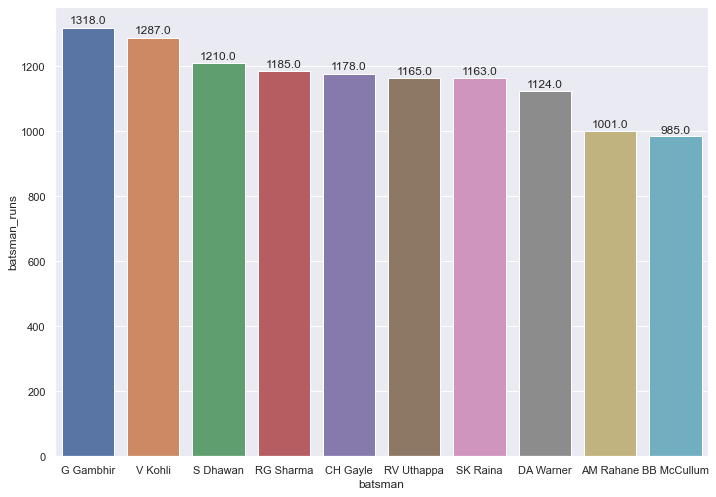

In [108]:
# Now let us see the batsman who has played the most number of dot balls.
temp_df = score_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

sns.set(rc={'figure.figsize':(11.7,8.27)})
p = sns.barplot(x="batsman", y="batsman_runs", data = temp_df)
show_values(p)

## Best Striker and Non-Stricker scores

In [124]:
score_df.groupby(['batsman', "non_striker"])['batsman_runs'].sum().reset_index(name = "Runs").sort_values("Runs", ascending= False )[:10]

,batsman,non_striker,Runs
940,CH Gayle,V Kohli,1508
1129,DA Warner,S Dhawan,1354
5119,V Kohli,CH Gayle,1142
5115,V Kohli,AB de Villiers,1068
249,AB de Villiers,V Kohli,1067
4144,RV Uthappa,G Gambhir,1011
4253,S Dhawan,DA Warner,888
1553,G Gambhir,RV Uthappa,784
1383,DR Smith,BB McCullum,684
2856,MEK Hussey,M Vijay,671


## Bowler Analysis

Now let us see the bowlers who has bowled most number of balls in IPL.

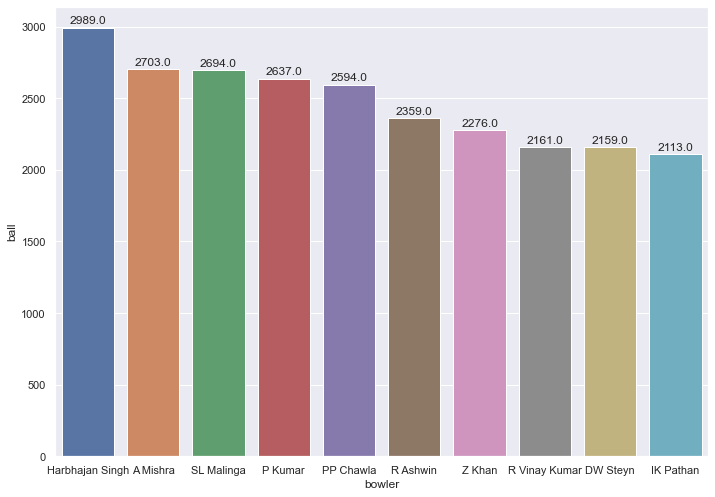

In [126]:
temp_df = score_df.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

sns.set(rc={'figure.figsize':(11.7,8.27)})
p = sns.barplot(x="bowler", y="ball", data = temp_df)
show_values(p)

>**Harbhajan Singh** is the the bowler with most number of balls bowled in IPL matches. Now let us see the bowler with more number of dot balls.

## Top Bowler with number of dot balls

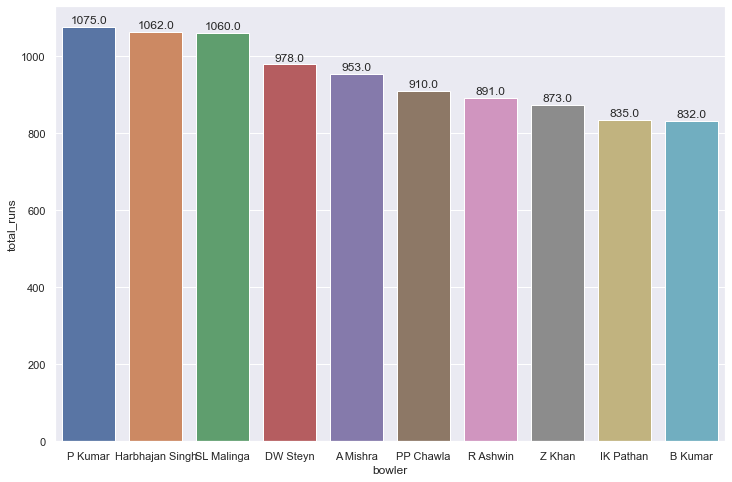

In [128]:
temp_df = score_df.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

sns.set(rc={'figure.figsize':(12,8)})
p = sns.barplot(x="bowler", y="total_runs", data = temp_df)
show_values(p)

>**Pravin Kumar** is the one with more number of dot balls followed by **Steyn and Malinga**

## bowlers who has bowled more number of extras in IPL.

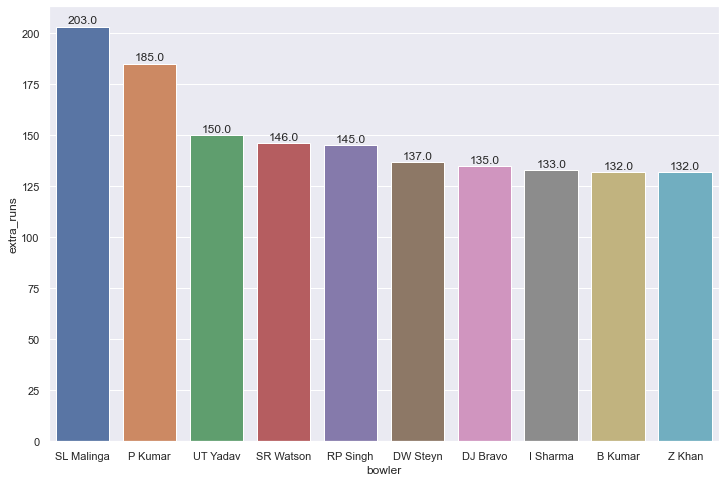

In [129]:
# Now let us see the bowlers who has bowled more number of extras in IPL.
temp_df = score_df.groupby('bowler')['extra_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='extra_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

sns.set(rc={'figure.figsize':(12,8)})
p = sns.barplot(x="bowler", y="extra_runs", data = temp_df)
show_values(p)

>**Malinga** tops the chart with 221 extra runs followed by **Pravin Kumar.**

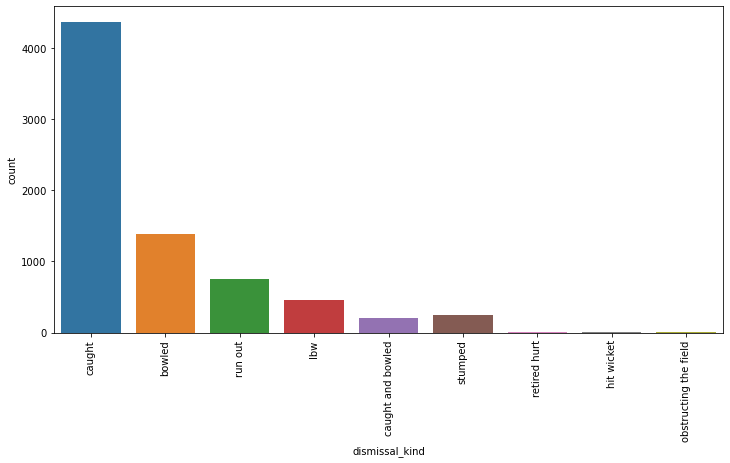

In [39]:
# Now let us see most common dismissal types in IPL.
plt.figure(figsize=(12,6))
sns.countplot(x='dismissal_kind', data=score_df)
plt.xticks(rotation='vertical')
plt.show()

>**Caught** is the most common dismissal type in IPL followed by Bowled. There are very few instances of hit wicket as well. **'Obstructing the field'** is one of the dismissal type as well in IPL.!

### <center><font color='darkblue'>Thank You For Having A Look At This Notebook </font></center>

**Please Upvote if this was Helpful**